In [3]:

import torch as t
import torchvision as tv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import torch.nn.functional as F
from datetime import datetime
from torch.autograd import Variable

import os
import math
seed = 7
# https://github.com/Madhu009/dataDL.ai/blob/master/MNIST-%20Exploration%20to%20Execution./MNIST_Complete_Analysis.ipynb

In [4]:
transform = tv.transforms.Compose([tv.transforms.ToTensor()])

train_data = tv.datasets.MNIST("data/train",train=True, download=True, transform = transform)
test_data = tv.datasets.MNIST("data/test",train=False,download=True,transform=transform)

# kwargs = {'num_workers': 10, 'pin_memory': True} # GPU
kwargs = {'num_workers': 1, 'pin_memory': False} # CPU

train_loader = t.utils.data.DataLoader(train_data,batch_size=32,shuffle=True,**kwargs)
test_loader = t.utils.data.DataLoader(test_data,batch_size=32,shuffle=True,**kwargs)

3.6%

100.1%

Extracting data/train/MNIST/raw/train-images-idx3-ubyte.gz to data/train/MNIST/raw


6.0%5%

Extracting data/train/MNIST/raw/train-labels-idx1-ubyte.gz to data/train/MNIST/raw


180.4%/app/.local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting data/train/MNIST/raw/t10k-images-idx3-ubyte.gz to data/train/MNIST/raw
Extracting data/train/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/train/MNIST/raw
Processing...


7.8%

Done!


100.1%

Extracting data/test/MNIST/raw/train-images-idx3-ubyte.gz to data/test/MNIST/raw


0.5%5%

Extracting data/test/MNIST/raw/train-labels-idx1-ubyte.gz to data/test/MNIST/raw


180.4%

Extracting data/test/MNIST/raw/t10k-images-idx3-ubyte.gz to data/test/MNIST/raw
Extracting data/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/test/MNIST/raw
Processing...
Done!


In [5]:
sampleX,sampleY = iter(train_loader).next()
print("The sample data shape is ",sampleX.shape,sampleY.shape)

The sample data shape is  torch.Size([32, 1, 28, 28]) torch.Size([32])


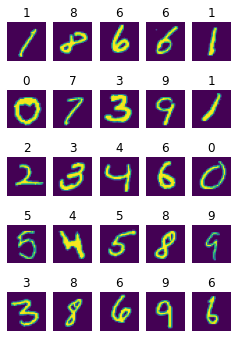

In [6]:
figure = plt.figure(figsize=(4,6))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis("off")
    plt.title(sampleY.numpy()[i])
    plt.imshow(sampleX.numpy()[i].squeeze())

In [7]:
use_cuda = t.cuda.is_available()
device = t.device("cuda" if use_cuda else "cpu")
device

device(type='cuda')

(60000, 1, 28, 28) (60000,)


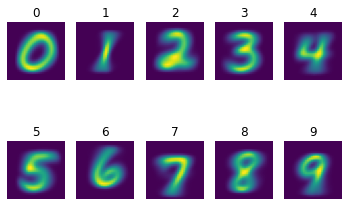

In [9]:
explore_X,explore_y = [],[]
for i in range(len(train_loader)):
    
    X,y = iter(train_loader).next()    
    explore_X.append(X.numpy())
    explore_y.append(y.numpy())
    
explore_X,explore_y = np.array(explore_X).reshape([60000,1,28,28]),np.array(explore_y).reshape([1875*32])
print(explore_X.shape,explore_y.shape)

def get_class_arrays(class_index):
    return explore_X[explore_y==class_index],explore_y[explore_y==class_index]

def get_mean_images():
    for i in range(10):
        class_arrayX,class_arrayY = get_class_arrays(i)
        mean_image = class_arrayX.mean(axis=0)
        plt.subplot(2,5,i+1)
        plt.axis("off")
        plt.title(i)
        plt.imshow(mean_image.squeeze())
        
get_mean_images()

In [10]:
def get_class_arrays(class_index):
    return explore_X[explore_y==class_index],explore_y[explore_y==class_index]

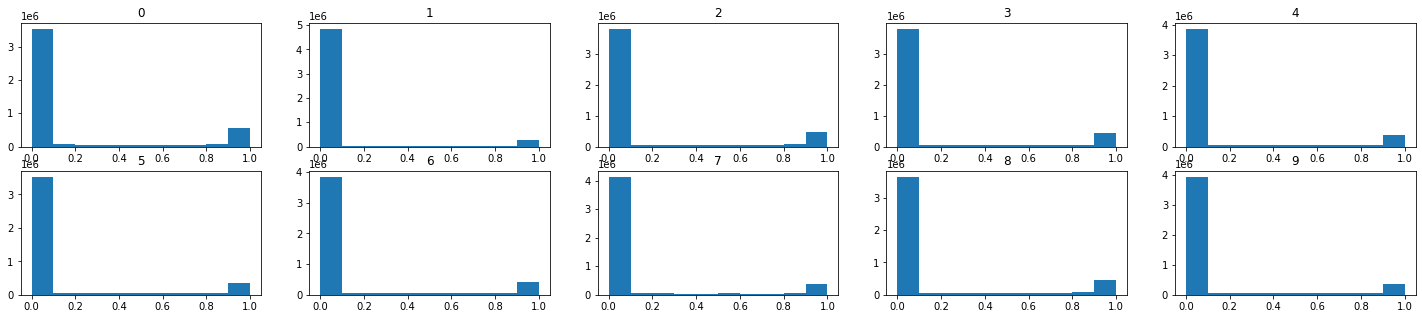

In [11]:
figure = plt.figure(figsize=(25,5))

def get_histogram():
    for i in range(10):
        class_arrayX,class_arrayY = get_class_arrays(i)
        plt.subplot(2,5,i+1)
        _ = plt.hist(class_arrayX.reshape(-1))
        plt.title(i)
get_histogram()

[0.17422223, 0.07613909, 0.14843102, 0.14084524, 0.1212611, 0.12876455, 0.13695364, 0.11451402, 0.14894305, 0.12237258]


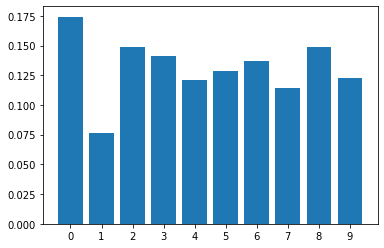

In [12]:
def get_mean_barchart():
    mean_values =[]
    for i in range(10):
        class_arrayX,class_arrayY = get_class_arrays(i)
        mean_values.append(class_arrayX.mean())
    
    plt.bar(np.arange(10),mean_values, align='center')
    plt.xticks(np.arange(10))
    print(mean_values)

get_mean_barchart()